# Importing data and library

In [1]:
library(rstatix)
library(stringr)
library(RColorBrewer)
library(dplyr)
library(tidyr)
library(tibble)
library(readr)
library(ggplot2)
library(purrr)
library(BiocManager)
library(org.Hs.eg.db)
library(clusterProfiler)
library(ReactomePA)
library(enrichplot)
library(ggraph)
library(ggforce)
library(knitr)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Bioconductor version '3.20' is out-of-date; the current release version '3.22'
  is available with R version '4.5'; see https://bioconductor.org/install

Bioconductor version '3.20' is out-of-date; the current release version '3.22'
  is available with R version '4.5'; see https://bioconductor.org/install

Loading required package: AnnotationDbi

Loading required package: AnnotationDbi

Loading required package: stats4

Loading 

## Evaluation of generated data

Data import (Analysis 1 - All scRNA-seq genes vs. Z-score < 0.05)

In [2]:
geral_results <- read.csv("results/GOenrich_p-value0.05_allSTRs.csv")
print(geral_results[, c("ONTOLOGY", "ID", "Description", "pvalue", "p.adjust", "Count")])

   ONTOLOGY         ID                                  Description
1        MF GO:0016740                         transferase activity
2        MF GO:0030554                    adenyl nucleotide binding
3        MF GO:0004674     protein serine/threonine kinase activity
4        MF GO:1901363                heterocyclic compound binding
5        MF GO:0004672                      protein kinase activity
6        MF GO:0140993                   histone modifying activity
7        MF GO:0043168                                anion binding
8        MF GO:0046873 metal ion transmembrane transporter activity
9        MF GO:0038023                  signaling receptor activity
10       MF GO:0060089                molecular transducer activity
         pvalue     p.adjust Count
1  3.608837e-06 0.0006135022    56
2  8.850685e-05 0.0030092329    48
3  2.885036e-04 0.0043273278    15
4  3.246125e-04 0.0043273278    55
5  3.309133e-04 0.0043273278    25
6  5.010402e-04 0.0047320465    14
7  1.36

In [3]:
# Load the saved object from the general analysis
simp_resultsGO <- readRDS("results/simp_resultsGO.rds")

# Check the object
cat("Object class:", class(simp_resultsGO), "\n")
cat("Number of enriched terms:", nrow(simp_resultsGO@result), "\n")
cat("Present ontologies:", unique(simp_resultsGO@result$ONTOLOGY), "\n")

head(simp_resultsGO)

Object class: enrichResult 
Number of enriched terms: 10 
Present ontologies: MF 
Number of enriched terms: 10 
Present ontologies: MF 


,ONTOLOGY,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0016740,MF,GO:0016740,transferase activity,56/352,67/601,0.8358209,1.427069,4.405673,3.608837e-06,0.0006135022,0.0004862432,5592/2321/1740/2122/64754/2066/241/5218/120892/5583/4249/814/23043/260425/1956/868/57118/7325/2241/55589/5579/3643/2534/54986/2632/83857/5578/3720/253782/6480/8202/23327/79068/7150/50515/26118/166929/54947/79668/2131/659/57551/84433/57534/6303/83539/4008/10135/3815/4297/2202/6098/8503/6348/255488/51232,56
GO:0030554,MF,GO:0030554,adenyl nucleotide binding,48/352,59/601,0.8135593,1.389060,3.738439,8.850685e-05,0.0030092329,0.0023850267,9223/861/5592/2321/9693/5144/2066/89795/10846/5218/120892/5583/201625/2762/814/23043/260425/1956/57118/4643/7325/2241/55589/8224/5579/3643/2534/54986/5578/23250/23347/7150/3709/84239/659/57551/72/488/59/57194/3815/9445/3248/2182/7184/1719/6098/9619,48
GO:0004674,MF,GO:0004674,protein serine/threonine kinase activity,15/352,15/601,1.0000000,1.707386,3.296103,2.885036e-04,0.0043273278,0.0034297087,5592/5218/120892/5583/814/23043/1956/57118/55589/5579/54986/5578/7150/659/57551,15
GO:1901363,MF,GO:1901363,heterocyclic compound binding,55/352,71/601,0.7746479,1.322623,3.439016,3.246125e-04,0.0043273278,0.0034297087,9223/861/5592/2321/9693/5144/2066/89795/10846/5218/120892/5583/201625/2762/3399/57381/814/23043/260425/1956/57118/4643/7325/2241/55589/8224/5579/3643/2534/54986/5578/7879/23250/23347/7150/3709/84239/55214/659/57551/54622/72/488/59/57194/3815/9445/3248/2182/5352/7184/1719/6098/388/9619,55
GO:0004672,MF,GO:0004672,protein kinase activity,25/352,28/601,0.8928571,1.524452,3.376407,3.309133e-04,0.0043273278,0.0034297087,5592/2321/2066/5218/120892/5583/814/23043/1956/57118/2241/55589/5579/3643/2534/54986/5578/7150/659/57551/3815/2202/6098/6348/51232,25
GO:0140993,MF,GO:0140993,histone modifying activity,14/352,14/601,1.0000000,1.707386,3.181625,5.010402e-04,0.0047320465,0.0037504764,2122/64754/9734/120892/23043/221037/55589/5579/54986/5578/3720/8202/57551/4297,14


Importação dos dados de scRNA-Seq

In [4]:
df_genes <- read_csv("../samples/gp_global/merged/merged_scovid.csv")
df_genes <- df_genes %>%
  select(-any_of(c("Dataset", "Accession", "Tissue")))
head(df_genes)


Rows: 2154 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Gene Symbol, Ensembl ID, Dataset, Accession, Tissue, origem
dbl (2): Pvalue, LogFC
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Gene Symbol, Ensembl ID, Dataset, Accession, Tissue, origem
dbl (2): Pvalue, LogFC

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Gene Symbol,Ensembl ID,Pvalue,LogFC,origem
<chr>,<chr>,<dbl>,<dbl>,<chr>
ACTB,ENSG00000075624,0.000000e+00,55.85834,BOST_bCells.csv
AFF3,ENSG00000144218,1.025257e-34,-71.19361,BOST_bCells.csv
ANKRD28,ENSG00000206560,2.737986e-11,-50.57273,BOST_bCells.csv
AP001011.1,AP001011.1,1.071438e-30,-25.42530,BOST_bCells.csv
B2M,ENSG00000166710,7.871196e-141,75.41427,BOST_bCells.csv
BACH2,ENSG00000112182,8.606669e-20,-52.76746,BOST_bCells.csv


Organization of GO results

In [5]:
# 1. Convert enrichResult object to data.frame
df_go <- as.data.frame(simp_resultsGO)

#2. Separate multiple EntrezIDs into lines
df_go_long <- df_go %>%
  separate_rows(geneID, sep = "/") %>%
  mutate(geneID = str_trim(geneID))

#3. Rename the geneID column to EntrezID for clarity.
df_go_long <- df_go_long %>%
  rename(EntrezID = geneID) %>%
  select(-any_of(c("Pvalue", "Dataset", "Accession")))

#4. Check for lines with empty or NA EntrezID
missing_entrez <- df_go_long %>% filter(is.na(EntrezID) | EntrezID == "")
cat("Number of lines without EntrezID:", nrow(missing_entrez), "\n")
print(missing_entrez)

#5. Remove rows without a valid EntrezID
df_go_long <- df_go_long %>% filter(!is.na(EntrezID) & EntrezID != "")

# 6. Extract numerical values from GeneRatio and BgRatio
df_go_long <- df_go_long %>%
  separate(GeneRatio, into = c("GeneRatio_num", "GeneRatio_den"), sep = "/", convert = TRUE) %>%
  separate(BgRatio, into = c("BgRatio_num", "BgRatio_den"), sep = "/", convert = TRUE) %>%
  mutate(GeneRatio_val = GeneRatio_num / GeneRatio_den,
         BgRatio_val = BgRatio_num / BgRatio_den)

#7. Text cleaning and normalization
df_go_long$Description <- str_trim(df_go_long$Description)
df_go_long$ONTOLOGY <- toupper(str_trim(df_go_long$ONTOLOGY))

#8. Save normalized result
write.csv(df_go_long, "df_go_normalized.csv", row.names = FALSE)

# Now df_go_long is ready with separate EntrezIDs and normalized data
cat("Lines in normalized df:", nrow(df_go_long), "\n")


Number of lines without EntrezID: 0 
# A tibble: 0 × 13
# ℹ 13 variables: ONTOLOGY <chr>, ID <chr>, Description <chr>, GeneRatio <chr>,
#   BgRatio <chr>, RichFactor <dbl>, FoldEnrichment <dbl>, zScore <dbl>,
#   pvalue <dbl>, p.adjust <dbl>, qvalue <dbl>, EntrezID <chr>, Count <int>
# A tibble: 0 × 13
# ℹ 13 variables: ONTOLOGY <chr>, ID <chr>, Description <chr>, GeneRatio <chr>,
#   BgRatio <chr>, RichFactor <dbl>, FoldEnrichment <dbl>, zScore <dbl>,
#   pvalue <dbl>, p.adjust <dbl>, qvalue <dbl>, EntrezID <chr>, Count <int>
Lines in normalized df: 349 
Lines in normalized df: 349 


Union of GO and df_genes data, generating df_merged

In [6]:
# Map EntrezIDs from df_go_long to Gene Symbols
df_go_long$Gene_Symbol <- mapIds(org.Hs.eg.db,
                                 keys = df_go_long$EntrezID,
                                 column = "SYMBOL",
                                 keytype = "ENTREZID",
                                 multiVals = "first")


# Merge with df_genes using Gene Symbol
df_merged <- inner_join(df_go_long, df_genes, by = c("Gene_Symbol" = "Gene Symbol"))

# Check merge result
cat("Lines in df_go_long:", nrow(df_go_long), "\n")
cat("Lines in df_genes:", nrow(df_genes), "\n")
cat("Lines in df_merged:", nrow(df_merged), "\n")

# Save result
write.csv(df_merged, "df_GO_genes_merged.csv", row.names = FALSE)

# Now df_merged contains GO enrichment information + gene expression data
head(df_merged)


'select()' returned 1:1 mapping between keys and columns

Warning message in inner_join(df_go_long, df_genes, by = c(Gene_Symbol = "Gene Symbol")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 259 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Warning message in inner_join(df_go_long, df_genes, by = c(Gene_Symbol = "Gene Symbol")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 259 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


Lines in df_go_long: 349 
Lines in df_genes: 2154 
Lines in df_merged: 757 
Lines in df_genes: 2154 
Lines in df_merged: 757 


ONTOLOGY,ID,Description,GeneRatio_num,GeneRatio_den,BgRatio_num,BgRatio_den,RichFactor,FoldEnrichment,zScore,⋯,qvalue,EntrezID,Count,GeneRatio_val,BgRatio_val,Gene_Symbol,Ensembl ID,Pvalue,LogFC,origem
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
MF,GO:0016740,transferase activity,56,352,67,601,0.8358209,1.427069,4.405673,⋯,0.0004862432,5592,56,0.1590909,0.1114809,PRKG1,ENSG00000185532,3.740718e-04,-34.00659,BOST_Endothelial.csv
MF,GO:0016740,transferase activity,56,352,67,601,0.8358209,1.427069,4.405673,⋯,0.0004862432,5592,56,0.1590909,0.1114809,PRKG1,ENSG00000185532,1.013803e-20,75.61964,Delorey_Endothelial.csv
MF,GO:0016740,transferase activity,56,352,67,601,0.8358209,1.427069,4.405673,⋯,0.0004862432,5592,56,0.1590909,0.1114809,PRKG1,ENSG00000185532,0.000000e+00,-67.16332,BOST_Fibroblasts.csv
MF,GO:0016740,transferase activity,56,352,67,601,0.8358209,1.427069,4.405673,⋯,0.0004862432,2321,56,0.1590909,0.1114809,FLT1,ENSG00000102755,4.643640e-03,-38.08154,BOST_Endothelial.csv
MF,GO:0016740,transferase activity,56,352,67,601,0.8358209,1.427069,4.405673,⋯,0.0004862432,2321,56,0.1590909,0.1114809,FLT1,ENSG00000102755,7.247617e-215,56.87190,Delorey_Endothelial.csv
MF,GO:0016740,transferase activity,56,352,67,601,0.8358209,1.427069,4.405673,⋯,0.0004862432,1740,56,0.1590909,0.1114809,DLG2,ENSG00000150672,4.696719e-262,-35.71702,BOST_Epithelial.csv


Separation of genes by cell type identified in scRNA-Seq studies

In [7]:
first_non_na <- function(x) {
  x <- x[!is.na(x)]
  if (length(x)) x[[1]] else NA
}

df_merged <- df_merged %>%
  mutate(cell_type = str_extract(origem, "(?<=_)[^_]+(?=\\.csv)")) %>%
  group_by(ONTOLOGY, ID, Description, cell_type) %>%
  summarise(
    across(c(GeneRatio_num, GeneRatio_den, BgRatio_num, BgRatio_den, 
             RichFactor, FoldEnrichment, zScore, GeneRatio_val, 
             BgRatio_val, Pvalue, LogFC),
           first_non_na),
    Gene_Symbol = paste(unique(na.omit(Gene_Symbol)), collapse = ";"),
    `Ensembl ID` = paste(unique(na.omit(`Ensembl ID`)), collapse = ";"),
    .groups = "drop"
  )

# Check the extracted cell types
print(unique(df_merged$cell_type))

 [1] "Endothelial"  "Epithelial"   "Fibroblasts"  "Macrophages"  "Mast"        
 [6] "Monocytes"    "Neuronal"     "Neutrophils"  "RBC"          "Unknown"     
[11] "bCells"       "muscle"       "tCells"       "DC"           "Plasma"      
[16] "SmoothMuscle"


Function for plotting genes enriched by cell type 

In [8]:
# Processing for plotting
process_and_plot <- function(df, cell_types, group_name, custom_titles = NULL, highlight_genes = NULL) {
  df_filtered <- df %>%
    filter(cell_type %in% cell_types)
  
  df_grouped <- df_filtered %>%
    mutate(
      Description = case_when(
        Description %in% c("protein kinase activity", "kinase activity") ~ "kinase activity",
        Description %in% c("transferase activity", "transferase activity, transferring phosphorus-containing groups") ~ "transferase activity",
        TRUE ~ Description
      )
    )
  # Filtering empty columns
  df_expanded <- df_grouped %>%
    separate_rows(Gene_Symbol, sep = ";") %>%
    mutate(Gene_Symbol = trimws(Gene_Symbol)) %>%
    filter(!is.na(Gene_Symbol) & Gene_Symbol != "")
  
  cell_types_in_data <- unique(df_expanded$cell_type)

# Plotting pie charts
  create_circular_plot <- function(cell_data, cell_name, highlight_genes = NULL) {
    data <- cell_data %>%
      select(Gene_Symbol, Description, FoldEnrichment) %>%
      arrange(Description)

    # Add empty bars for spacing
    empty_bar <- 3
    to_add <- data.frame(matrix(NA, empty_bar * n_distinct(data$Description), ncol(data)))
    colnames(to_add) <- colnames(data)
    to_add$Description <- rep(unique(data$Description), each = empty_bar)
    data <- bind_rows(data, to_add) %>% arrange(Description)
    data$id <- seq_len(nrow(data))

    # Calculation of label angles and positions
    label_data <- data %>% filter(!is.na(Gene_Symbol))
    number_of_bar <- nrow(data)
    angle <- 90 - 360 * (label_data$id - 0.5) / number_of_bar
    label_data <- label_data %>%
      mutate(
        hjust = if_else(angle < -90, 1, 0),
        angle = if_else(angle < -90, angle + 180, angle),
        color = if (!is.null(highlight_genes)) if_else(Gene_Symbol %in% highlight_genes, "red", "black") else "black"
      )
    
    title_text <- if (!is.null(custom_titles) && cell_name %in% names(custom_titles)) {
      custom_titles[[cell_name]]
    } else {
      cell_name
    }

    # Graph construction
    ggplot(data, aes(x = factor(id), y = FoldEnrichment, fill = Description)) +
      geom_bar(stat = "identity", alpha = 0.6) +
      ylim(-max(data$FoldEnrichment, na.rm = TRUE) * 0.5,
           max(data$FoldEnrichment, na.rm = TRUE) * 1.2) +
      coord_polar() +
      geom_text(
        data = label_data,
        aes(
          x = id,
          y = FoldEnrichment + max(data$FoldEnrichment, na.rm = TRUE) * 0.1,
          label = Gene_Symbol,
          hjust = hjust,
          color = color
        ),
        fontface = "bold",
        size = 2.5,
        angle = label_data$angle,
        inherit.aes = FALSE
      ) +
      scale_color_identity() +
      theme_minimal() +
      theme(
        legend.position = "right",
        axis.text = element_blank(),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5, face = "bold")
      ) +
      ggtitle(title_text)
  }
  
  for (cell in cell_types_in_data) {
    cell_data <- df_expanded %>% filter(cell_type == cell)
    p <- create_circular_plot(cell_data, cell, highlight_genes)  # highlight_genes passado aqui
    filename <- paste0("results/", group_name, "_", cell, "_genes_barplot.png")
    ggsave(filename, plot = p, width = 10, height = 8, dpi = 600)
    message("Saved chart: ", filename)
  }
}


Chamada e customização dos títulos e genes em destaque

In [9]:
# Vectors with cell types and titles
immuno_cells <- c("Macrophages", "Mast", "Monocytes", "Neutrophils", "bCells", "tCells")
immuno_titles <- c(
  Macrophages = "Macrophages",
  Mast = "Mastocytes",
  Monocytes = "Monocytes",
  Neutrophils = "Neutrophils",
  bCells = "Linfocytes B",
  tCells = "Linfocytes T"
)

host_cells <- c("Endothelial", "Epithelial", "Fibroblasts")
host_titles <- c(
  Endothelial = "Endothelial Cells",
  Epithelial = "Epitelial Cells",
  Fibroblasts = "Fibroblasts"
)

highlight_genes <- c("CDK14", "KIT")

process_and_plot(df_merged, immuno_cells, "immuno", immuno_titles, highlight_genes)
process_and_plot(df_merged, host_cells, "host", host_titles, highlight_genes)


Warning message:
“Removed 30 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Saved chart: results/immuno_Macrophages_genes_barplot.png

Saved chart: results/immuno_Macrophages_genes_barplot.png

Warning message:
“Removed 30 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 30 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Saved chart: results/immuno_Mast_genes_barplot.png

Saved chart: results/immuno_Mast_genes_barplot.png

Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Saved chart: results/immuno_Monocytes_genes_barplot.png

Saved chart: results/immuno_Monocytes_genes_barplot.png

Warning message:
“Removed 27 rows containing missing values or values outside the scale range
(`geom_bar()`).

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggtangle package.
  Please report the issue to the authors.”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


Plot save at: results/cnetplot_MF_circular_custom.png


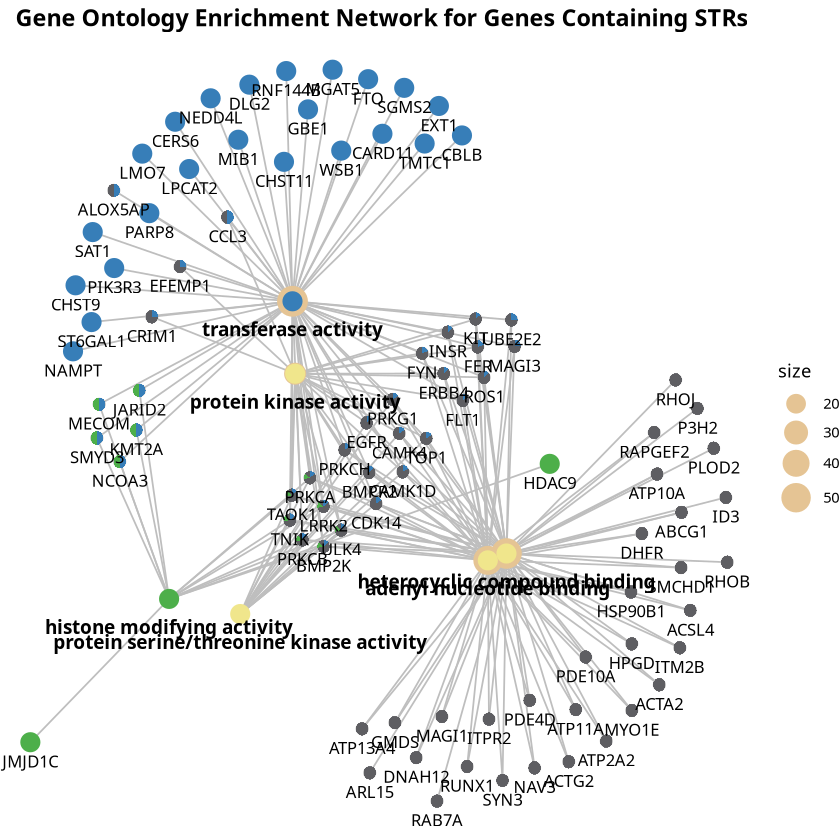

In [10]:
# Function to combine terms in the enrichResult object
combine_terms <- function(er, term_groups) {
  er_new <- er
  
  for (group in term_groups) {
    terms <- group$terms
    new_desc <- group$new_description
    
    idx_terms <- which(er_new@result$Description %in% terms)
    if (length(idx_terms) > 1) {
      combined_genes <- unique(unlist(strsplit(er_new@result$geneID[idx_terms], "/")))
      combined_geneID <- paste(combined_genes, collapse = "/")
      
      idx_main <- idx_terms[1]
      
      er_new@result$Description[idx_main] <- new_desc
      er_new@result$geneID[idx_main] <- combined_geneID
      er_new@result$Count[idx_main] <- length(combined_genes)
      
      er_new@result$pvalue[idx_main] <- min(er_new@result$pvalue[idx_terms])
      er_new@result$p.adjust[idx_main] <- min(er_new@result$p.adjust[idx_terms])
      
      er_new@result <- er_new@result[-idx_terms[-1], ]
    }
  }
  
  return(er_new)
}

# Defining the groups to combine
groups_to_combine <- list(
  list(terms = c("protein kinase activity", "kinase activity"), new_description = "kinase activity"),
  list(terms = c("transferase activity", "transferase activity, transferring phosphorus-containing groups"), new_description = "transferase activity")
)

# Apply combination to enrichResult object
mf_combined <- combine_terms(simp_resultsGO, groups_to_combine)

# Converter para símbolos legíveis
mf_combined <- setReadable(mf_combined, OrgDb = org.Hs.eg.db, keyType = "ENTREZID")

# Set custom colors for matched terms
term_colors <- c(
  "kinase activity" = "#E41A1C",              # vermelho
  "transferase activity" = "#377EB8",         # azul
  "histone modifying activity" = "#4DAF4A"    # verde
)

# Generate circular plot, removing original labels
p_circular <- cnetplot(mf_combined,
                       circular = TRUE,
                       colorEdge = TRUE,
                       showCategory = 6,
                       node_label = "none")


# Extract data from the plot
plot_data <- p_circular$data

# Create columns for colors
plot_data$color_custom <- NA
plot_data$is_multi_term <- FALSE

# Gene mapping for associated terms
gene_to_terms <- list()

# First step: create gene mapping for your terms and colors
for (i in seq_len(nrow(mf_combined@result))) {
  term_desc <- mf_combined@result$Description[i]
  term_color <- if (term_desc %in% names(term_colors)) term_colors[term_desc] else "#22212994"
  
  genes_in_term <- strsplit(mf_combined@result$geneID[i], "/")[[1]]
  
  for (gene in genes_in_term) {
    if (is.null(gene_to_terms[[gene]])) {
      gene_to_terms[[gene]] <- list(terms = c(term_desc), colors = c(term_color))
    } else {
      if (!(term_desc %in% gene_to_terms[[gene]]$terms)) {
        gene_to_terms[[gene]]$terms <- c(gene_to_terms[[gene]]$terms, term_desc)
        gene_to_terms[[gene]]$colors <- c(gene_to_terms[[gene]]$colors, term_color)
      }
    }
  }
}

# Prepare data for genes with multiple terms (to create sectors)
pie_data <- data.frame()

# Second step: assign colors to the plot nodes
for (i in seq_len(nrow(plot_data))) {
  if (!is.na(plot_data$label[i])) {
    label_char <- as.character(plot_data$label[i])
    
    # If it is a GO term
    if (label_char %in% mf_combined@result$Description) {
      if (label_char %in% names(term_colors)) {
        plot_data$color_custom[i] <- term_colors[label_char]
      } else {
        plot_data$color_custom[i] <- "#F0E68C"
      }
    } 
    # If it is a gene
    else if (label_char %in% names(gene_to_terms)) {
      colors_for_gene <- gene_to_terms[[label_char]]$colors
      
      if (length(colors_for_gene) == 1) {
        plot_data$color_custom[i] <- colors_for_gene[1]
      } else {
        plot_data$is_multi_term[i] <- TRUE
        
        n_colors <- length(colors_for_gene)
        for (j in seq_along(colors_for_gene)) {
          pie_data <- rbind(pie_data, data.frame(
            x = plot_data$x[i],
            y = plot_data$y[i],
            label = label_char,
            start = (j-1) * 2*pi / n_colors,
            end = j * 2*pi / n_colors,
            color = colors_for_gene[j],
            stringsAsFactors = FALSE
          ))
        }
      }
    } else {
      plot_data$color_custom[i] <- "gray"
    }
  }
}

# Update plot data
p_circular$data <- plot_data

# Create plot with custom colors
p_circular <- p_circular +
  geom_node_point(data = subset(p_circular$data, !is.na(color_custom) & !is_multi_term),
                  aes(x = x, y = y, color = color_custom),
                  size = 5) +
  scale_color_identity()

# Add pies for genes with multiple terms (smaller circles)
if (nrow(pie_data) > 0) {
  p_circular <- p_circular +
    geom_arc_bar(data = pie_data,
                 aes(x0 = x, y0 = y, r0 = 0, r = 0.1,
                     start = start, end = end, fill = color),
                     size = 0,
                 inherit.aes = FALSE) +
    scale_fill_identity()
}

# ---- Add custom labels ----
# Labels for GO terms (bold, larger)
go_nodes <- subset(plot_data, label %in% mf_combined@result$Description)
p_circular <- p_circular + 
  geom_text(data = go_nodes,
            aes(x = x, y = y, label = label),
            fontface = "bold",
            size = 4,
            vjust = 2.5)

# Gene labels (normal, minor)
gene_nodes <- subset(plot_data, label %in% names(gene_to_terms))
p_circular <- p_circular + 
  geom_text(data = gene_nodes,
            aes(x = x, y = y, label = label),
            size = 3.5,
            vjust = 2.1)

# Final adjustments to the title and theme
p_circular <- p_circular +
  ggtitle("Gene Ontology Enrichment Network for Genes Containing STRs") +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white"),

  )

print(p_circular)

# ---- Save plot in high resolution ----
dir.create("results", showWarnings = FALSE)

ggsave("results/cnetplot_MF_circular_custom.png",
       plot = p_circular,
       width = 14,
       height = 12,
       dpi = 600)

cat("Plot save at: results/cnetplot_MF_circular_custom.png\n")
